<a href="https://colab.research.google.com/github/AbCheikh/Start_Coding_TF/blob/main/First_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


In [2]:
tf.__version__

'2.8.2'

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train = tf.keras.utils.normalize(x_train, axis= 1)
x_test  = tf.keras.utils.normalize(x_test, axis= 1)

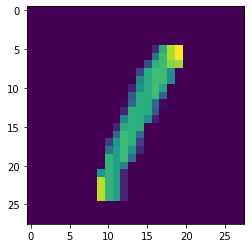

(28, 28)


In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[77])
plt.show()
print(x_train[77].shape)

In [8]:
model = tf.keras.models.Sequential()

# we need to make our input layer flat 1xN
#This will serve as our input layer. It's going to take the data we throw at it, and just flatten it for us.

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
model.fit(x_train, y_train, epochs=3)
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss) 
print(val_acc)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2671 - accuracy: 0.9224
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1108 - accuracy: 0.9656
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1033 - accuracy: 0.9691
0.10326650738716125
0.9690999984741211


In [10]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)


In [12]:
import numpy as np
print(np.argmax(predictions[0]))

7
